<p>Introdução: Nos basearemos em gorjetas e sabemos aplicamos 10% do valor total da conta no Brasil, enquanto em demais países os clientes têm costume de dar caixinha livremente, sem uma porcentagem específica.</p>

# Importando base de dados

In [1]:
import pandas as pd
import seaborn as sns
!pip show seaborn
!pip show pandas

Name: seaborn
Version: 0.11.1
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: c:\users\reina\anaconda3\lib\site-packages
Requires: numpy, matplotlib, scipy, pandas
Required-by: 
Name: pandas
Version: 1.2.4
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: None
Author-email: None
License: BSD
Location: c:\users\reina\anaconda3\lib\site-packages
Requires: python-dateutil, numpy, pytz
Required-by: statsmodels, seaborn


In [2]:
dados = pd.read_csv('dados/tips.csv')

In [3]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Tradução dos dados

In [4]:
troca = {'total_bill':'valor_da_conta',
         'tip':'gorjeta',
         'dessert':'sobremesa',
         'day':'dia_da_semana',
         'time':'hora_do_dia',
         'size':'total_de_pessoas'}
gorjetas = dados.rename(columns=troca)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [5]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [6]:
sim_nao = {
    'No':'Não',
    'Yes':'Sim'
}
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [7]:
gorjetas.head()  # nao ficou salvo

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [8]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [9]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [10]:
dias = {
    'Sun':'Domingo',
    'Sat':'Sábado',
    'Thur':'Quinta',
    'Fri':'Sexta'
}
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)


In [11]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [12]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

In [13]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [14]:
hora = { 
    'Dinner':'Jantar',
    'Lunch':'Almoço'
}

gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)


In [15]:
gorjetas.sample(5)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
154,19.77,2.00,Não,Domingo,Jantar,4
48,28.55,2.05,Não,Domingo,Jantar,3
231,15.69,3.00,Sim,Sábado,Jantar,3
218,7.74,1.44,Sim,Sábado,Jantar,2
192,28.44,2.56,Sim,Quinta,Almoço,2


# Análise 1 - Valor da conta e gorjeta

In [16]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

<AxesSubplot:xlabel='valor_da_conta', ylabel='gorjeta'>

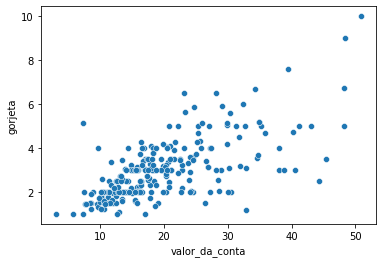

In [17]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta',y='gorjeta',data=gorjetas)
valor_gorjeta

**Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [18]:
print('A base de dados contém {} registros. \n'.format(gorjetas.shape[0]))
print('Registros não nulos:')
gorjetas.count()

A base de dados contém 244 registros. 

Registros não nulos:


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

# Criando o campo ' porcentagem '

In [19]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2


In [20]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] /gorjetas['valor_da_conta']

In [21]:
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587


In [22]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [23]:
gorjetas.head(3)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17


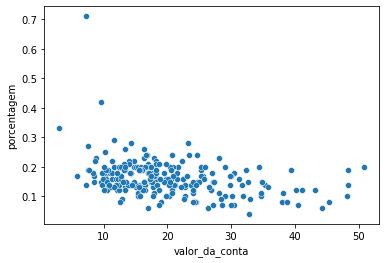

In [24]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta',y='porcentagem',data=gorjetas)

**Visualmente o valor da conta não é proporcional ao valor da gorjeta**

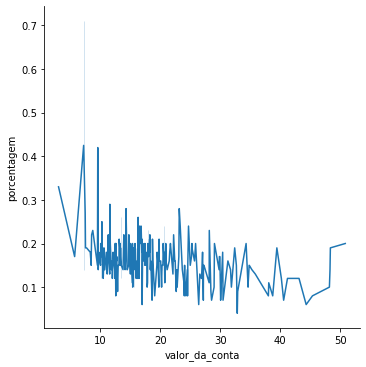

In [25]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem',data=gorjetas, kind='line')

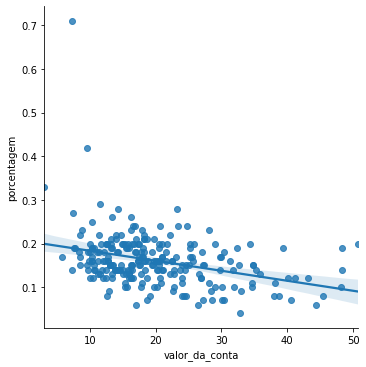

In [26]:
sns.lmplot(x='valor_da_conta', y='porcentagem',data=gorjetas)

# Análise 2 - Sobremesa

In [28]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06


In [30]:
gorjetas[gorjetas.sobremesa=='Sim']

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
56,38.01,3.00,Sim,Sábado,Jantar,4,0.08
58,11.24,1.76,Sim,Sábado,Jantar,2,0.16
60,20.29,3.21,Sim,Sábado,Jantar,2,0.16
61,13.81,2.00,Sim,Sábado,Jantar,2,0.14
62,11.02,1.98,Sim,Sábado,Jantar,2,0.18
...,...,...,...,...,...,...,...
234,15.53,3.00,Sim,Sábado,Jantar,2,0.19
236,12.60,1.00,Sim,Sábado,Jantar,2,0.08
237,32.83,1.17,Sim,Sábado,Jantar,2,0.04
240,27.18,2.00,Sim,Sábado,Jantar,2,0.07


In [31]:
gorjetas[gorjetas.sobremesa=='Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [32]:
gorjetas[gorjetas.sobremesa=='Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


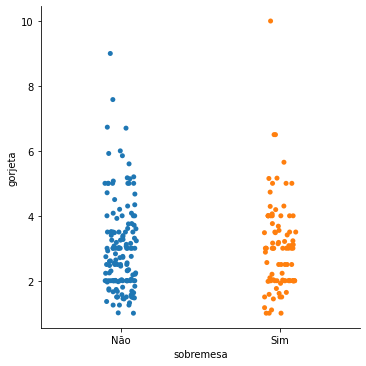

In [33]:
sns.catplot(x='sobremesa',y='gorjeta',data=gorjetas)

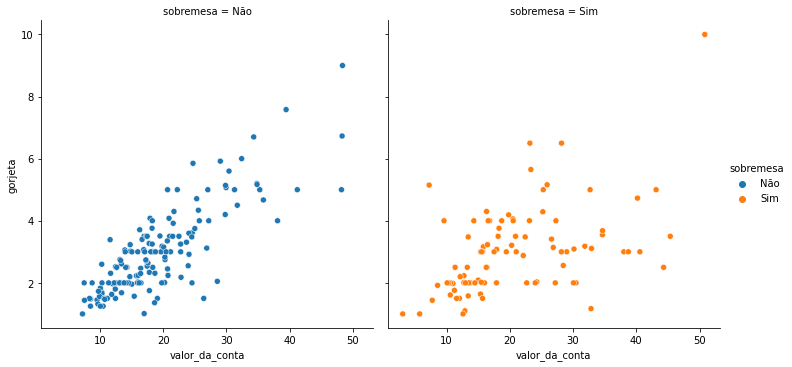

In [40]:
sns.relplot(x='valor_da_conta',y='gorjeta',data=gorjetas,hue='sobremesa', col='sobremesa')

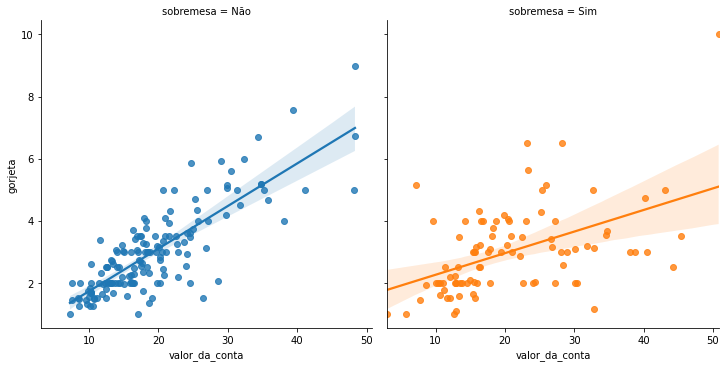

In [42]:
sns.lmplot(x='valor_da_conta',y='gorjeta',data=gorjetas,hue='sobremesa',col='sobremesa')

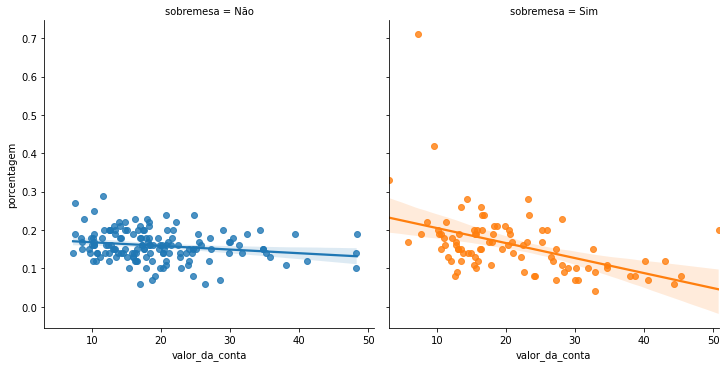

In [43]:
sns.lmplot(x='valor_da_conta',y='porcentagem',data=gorjetas,hue='sobremesa',col='sobremesa')

**Visualmente existe uma difenrença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa**

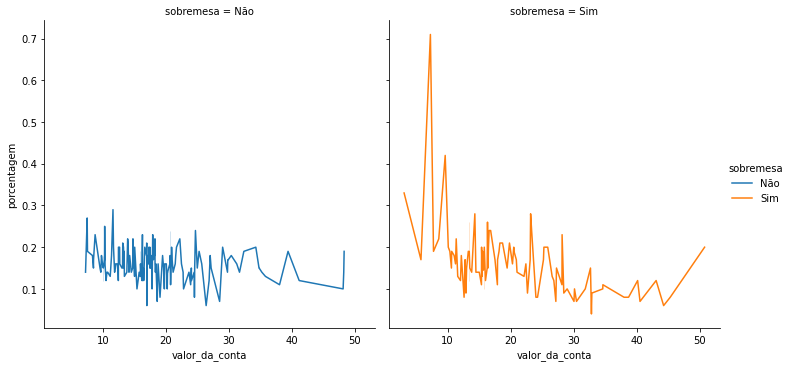

In [45]:
sns.relplot(x='valor_da_conta',y='porcentagem',data=gorjetas,hue='sobremesa', col='sobremesa',kind='line')

# Teste de hipótese

## Hipóteses:
H0 -> A distribuição da taxa da gorjeta é a mesma nos dois grupos da sobremesa.

H1 -> A distribuição da taxa da gorjeta não é a mesma nos dois grupos da sobremesa.

In [46]:
from scipy.stats import ranksums

In [48]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [49]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [51]:
r = ranksums(sobremesa,sem_sobremesa)

Lembrando: para ter aceito a hipotese 1 o p-value teria q ser igual ou menor q 0.05

In [54]:
print('o valor do p_value é {}'.format(r.pvalue))

o valor do p_value é 0.5266635660124415


A distribuição da taxa da gorjeta é a mesma nos dois grupos da sobremesa.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ranksums.html

# Análise 3 - Dia da semana

In [58]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

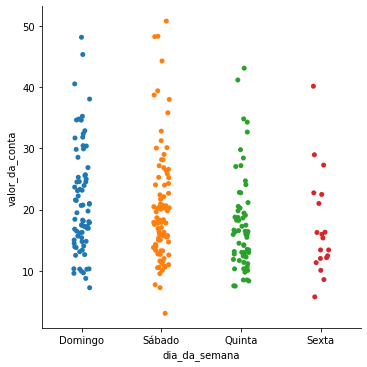

In [59]:
sns.catplot(x='dia_da_semana',y='valor_da_conta',data=gorjetas)

Visualmente vefificamos que Quinta e Sexta as pessoas gastam menos e possuem menor movimento.

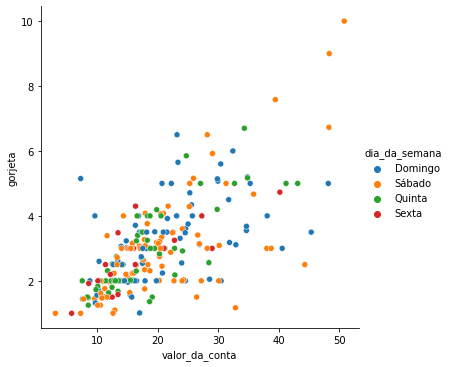

In [60]:
sns.relplot(x='valor_da_conta',y='gorjeta',hue='dia_da_semana',data=gorjetas)

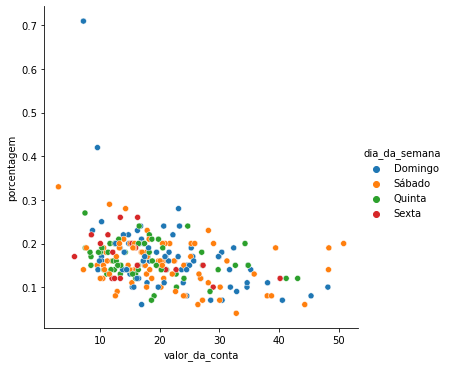

In [61]:
sns.relplot(x='valor_da_conta',y='porcentagem',hue='dia_da_semana',data=gorjetas)

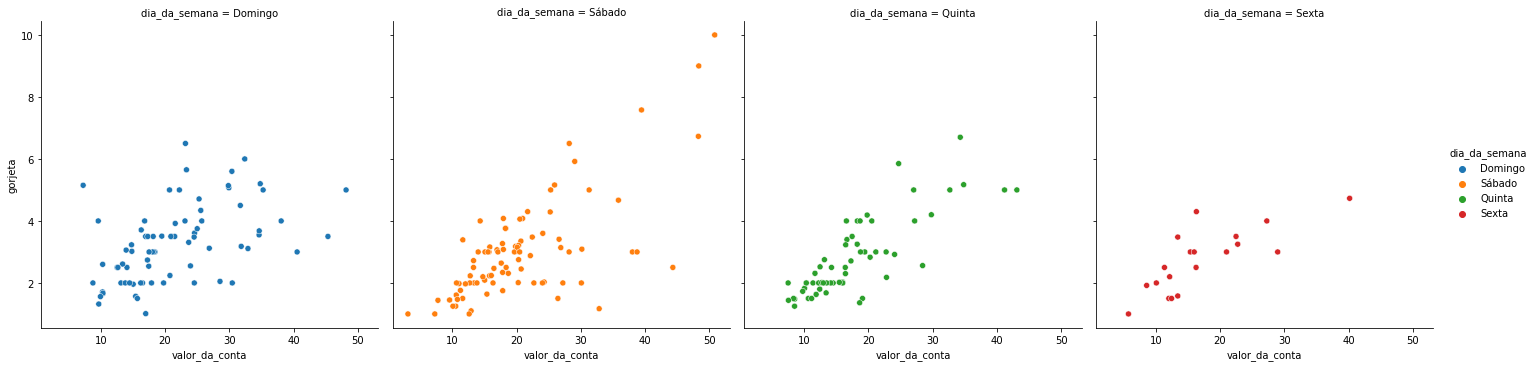

In [67]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

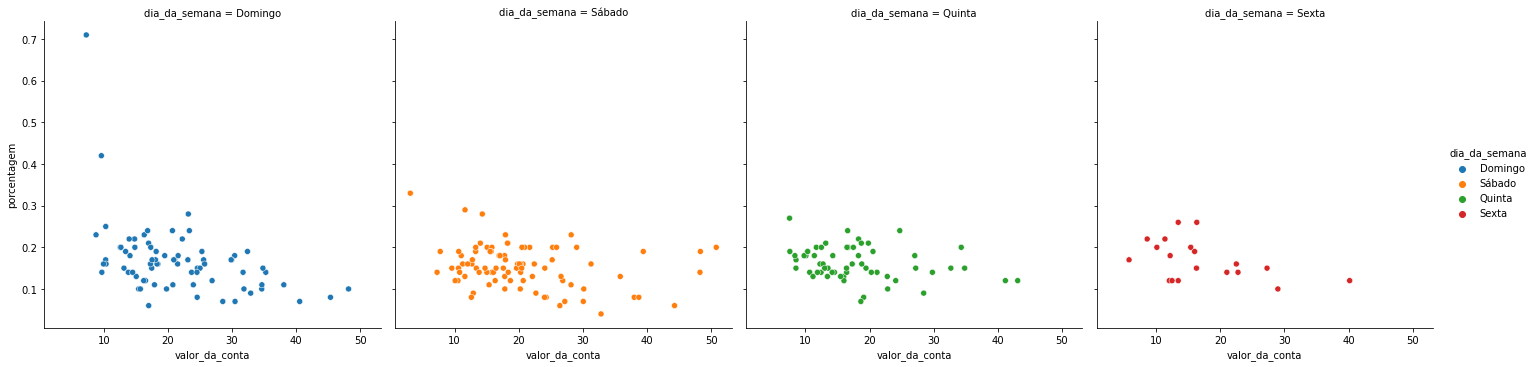

In [65]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

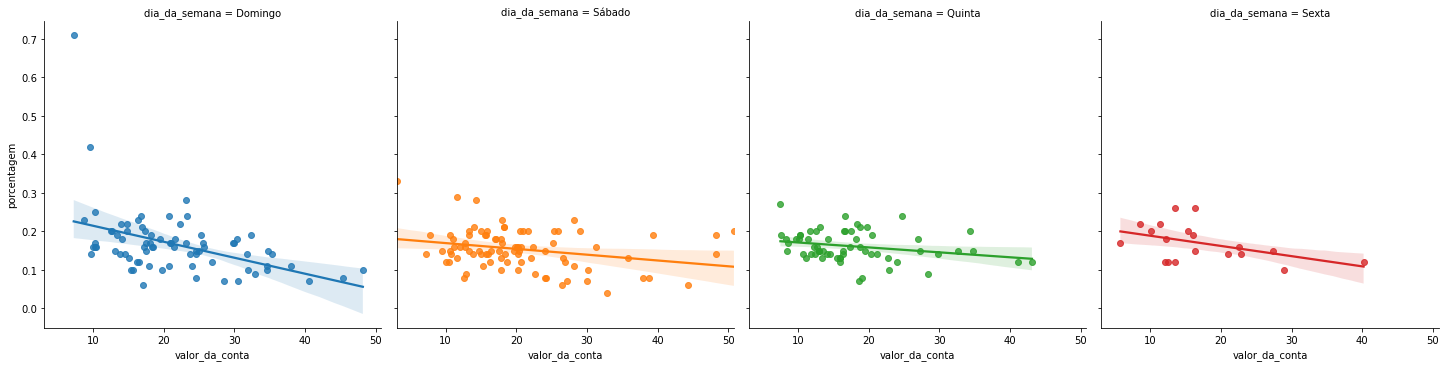

In [68]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [69]:
media_gorjeta = gorjetas.gorjeta.mean()

# Análise descritiva

In [74]:
print('A média geral das gorjetas é de {:.3f}'.format(media_gorjeta))

A média geral das gorjetas é de 2.998


In [76]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta','gorjeta','porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [79]:
print('Frequência dos dia')
gorjetas.dia_da_semana.value_counts()

Frequência dos dia


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

# Teste de hipótese 2 

H0 -> A distribuição do valor da conta é igual no Sábado e no domingo.


H1 -> A distribuição do valor da conta não é igual no Sábado e no domingo.

In [81]:
conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [86]:
r2 = ranksums(conta_domingo,conta_sabado)
print('O valor do p-value é {:.3f}'.format(r2.pvalue))

O valor do p-value é 0.358


A distribuição do valor da conta é igual no sabado e no domingo

# Teste de hipótese 3

H0 -> A distribuição do valor da conta é igual no Sábado e na Quinta.

H1 -> A distribuição do valor da conta não é igual no Sábado e na Quinta. 

In [89]:
conta_quinta = gorjetas.query("dia_da_semana == 'Quinta'").valor_da_conta

In [94]:
r3 = ranksums(conta_quinta,conta_sabado)
print('O valor do p-value é {:.3f}'.format(r3.pvalue))

O valor do p-value é 0.047


A distribuição do valor da conta não é igual no Sábado e na Quinta

# Análise 4 - Hora do dia

In [96]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

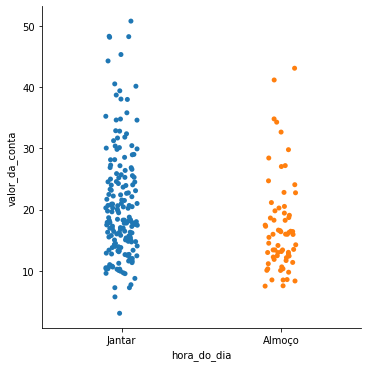

In [100]:
sns.catplot(x='hora_do_dia',y='valor_da_conta',data=gorjetas)

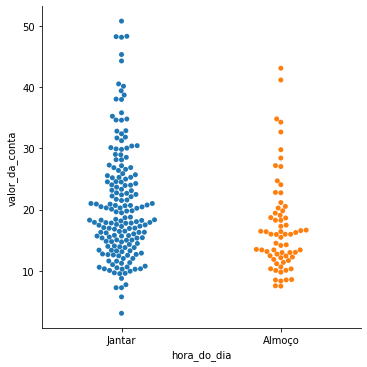

In [101]:
sns.catplot(x='hora_do_dia',y='valor_da_conta',data=gorjetas,kind='swarm')

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

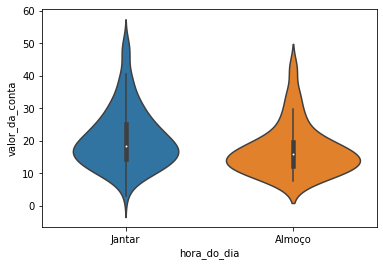

In [104]:
sns.violinplot(x='hora_do_dia',y='valor_da_conta',data=gorjetas)

<AxesSubplot:xlabel='hora_do_dia', ylabel='valor_da_conta'>

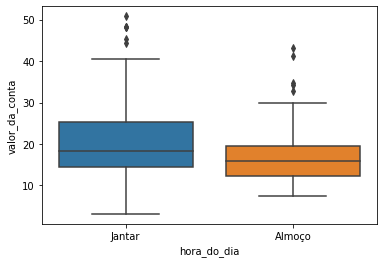

In [105]:
sns.boxplot(x='hora_do_dia',y='valor_da_conta',data=gorjetas)

In [108]:
valor_almoco = gorjetas.query("hora_do_dia =='Almoço'").valor_da_conta
valor_jantar = gorjetas.query("hora_do_dia =='Jantar'").valor_da_conta

<AxesSubplot:xlabel='valor_da_conta', ylabel='Count'>

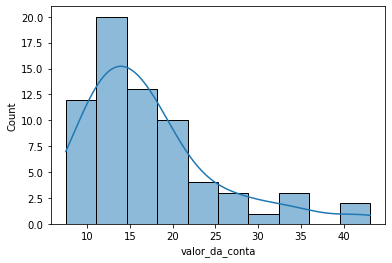

In [111]:
sns.histplot(valor_almoco,kde=True)

<AxesSubplot:xlabel='valor_da_conta', ylabel='Count'>

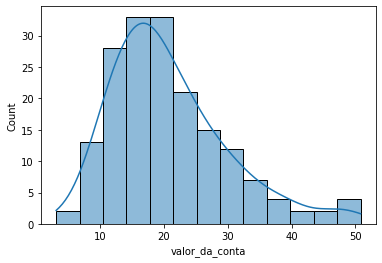

In [119]:
sns.histplot(valor_jantar,kde=True)

In [125]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta','gorjeta' ,'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


# Teste de hipótese 4

H0 -> A distribuição do valor da conta é igual no Jantar e na Almoço.

H1 -> A distribuição do valor da conta não é igual no Jantar e na Almoço.

In [115]:
valor_janta = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta
valor_almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

In [118]:
r4 = ranksums(valor_janta,valor_almoco)
print('O valor do p-value é {:.3f}'.format(r4.pvalue))

O valor do p-value é 0.001


A distribuição do valor da conta não é igual no Jantar e na Almoço.

# Teste de hipótese 5

H0 -> A distribuição da porcentagem é igual no Jantar e na Almoço.

H0 -> A distribuição da porcentagem não é igual no Jantar e na Almoço.

In [126]:
porcentagem_janta = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [128]:
r5 = ranksums(porcentagem_janta,porcentagem_almoco)
print('O valor do p-value é {:.3f}'.format(r5.pvalue))

O valor do p-value é 0.260


A distribuição da porcentagem é igual no Jantar e na Almoço.